In [50]:
from keras.models import Sequential
import tensorflow as tf

In [51]:
model=Sequential()

In [52]:
# to tell how many hidden layer is used
from keras.layers import  Dense 


In [53]:
#for one hidden layer;for two hidden layer use model
#model.add(Dense()) two time

#units=1 i.e.output ill be 1 and input is also  1 feature which has 2
#units=y
#input=x
#Dense():add hidden layer
model.add(Dense(units=1,input_shape=(1,)))

In [54]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_2 (Dense)              (None, 1)                 2         
Total params: 2
Trainable params: 2
Non-trainable params: 0
_________________________________________________________________


In [55]:
from keras.optimizers import Adam,SGD

In [56]:
#combining the newtwork i,e input layer,hiddenlayer,output layer
#S Gradient Descent,and Adam are optimizer for optimizing  model
model.compile(optimizer=Adam(),loss='mean_squared_error')  

In [57]:
import pandas as pd

In [58]:
df=pd.read_csv('weight-height.csv')

In [59]:
df.head(2)

,Gender,Height,Weight
0,Male,73.847017,241.893563
1,Male,68.781904,162.310473


In [60]:
y=df.iloc[:,-1]

In [61]:
x=df.iloc[:,1:2]

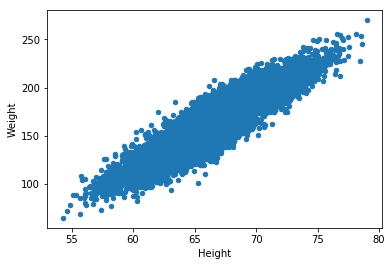

In [62]:
df.plot(kind='scatter',x='Height',y='Weight')


In [83]:
model.fit(x,y,epochs=50)

Epoch 1/50
10000/10000 [==============================] - 0s 49us/step - loss: 666.3314
Epoch 2/50
10000/10000 [==============================] - 1s 60us/step - loss: 601.7193
Epoch 3/50
10000/10000 [==============================] - 1s 51us/step - loss: 577.1534
Epoch 4/50
10000/10000 [==============================] - 0s 47us/step - loss: 569.3560
Epoch 5/50
10000/10000 [==============================] - 0s 47us/step - loss: 567.3911
Epoch 6/50
10000/10000 [==============================] - 0s 48us/step - loss: 566.9870
Epoch 7/50
10000/10000 [==============================] - 0s 47us/step - loss: 566.8322
Epoch 8/50
10000/10000 [==============================] - 1s 50us/step - loss: 566.7663
Epoch 9/50
10000/10000 [==============================] - 0s 49us/step - loss: 566.6964
Epoch 10/50
10000/10000 [==============================] - 1s 50us/step - loss: 566.6916
Epoch 11/50
10000/10000 [==============================] - 1s 55us/step - loss: 566.5911
Epoch 12/50
10000/10000 [=====

In [64]:
y_pred=model.predict(x)

In [65]:
y_pred

array([[177.63255],
       [165.56055],
       [178.2596 ],
       ...,
       [153.84889],
       [166.16196],
       [149.2639 ]], dtype=float32)

In [66]:
import matplotlib.pyplot as plt

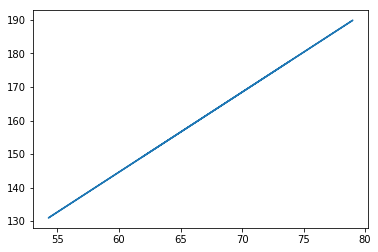

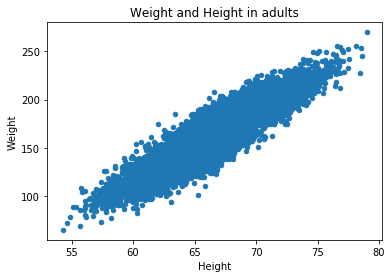

In [84]:
import  matplotlib.pyplot  as plt
plt.plot(x,y_pred)
df.plot(kind='Scatter',
        x='Height',
        y='Weight',
        title='Weight and Height in adults')


In [87]:
W,B=model.get_weights()

In [88]:
B

array([-0.8155959], dtype=float32)

In [89]:
W

array([[2.4557376]], dtype=float32)

In [90]:
from sklearn.metrics import r2_score

In [92]:
# Evaluating Model Performance
from sklearn.metrics import r2_score
print("The R2 score is {:0.3f}".format(r2_score(y, y_pred)))


The R2 score is 0.444


In [93]:
# to train again

W[0,0]=0.0
B[0]=0.0
model.set_weights((W,B))

In [94]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y,
                                                    test_size=0.2)

In [95]:
model.fit(x_train,y_train,epochs=10,verbose=0) #epochs will not be shown using verbose=0

In [96]:
y_train_pred = model.predict(x_train).ravel()
y_test_pred = model.predict(x_test).ravel()

In [97]:
from sklearn.metrics import mean_squared_error as mse

In [98]:
print("The Mean Squared Error on the Train set is:\t{:0.1f}".format(mse(y_train, y_train_pred)))
print("The Mean Squared Error on the Test set is:\t{:0.1f}".format(mse(y_test, y_test_pred)))

The Mean Squared Error on the Train set is:	624.1
The Mean Squared Error on the Test set is:	654.6


In [99]:
print("The R2 score on the Train set is:\t{:0.3f}".format(r2_score(y_train, y_train_pred)))
print("The R2 score on the Test set is:\t{:0.3f}".format(r2_score(y_test, y_test_pred)))

The R2 score on the Train set is:	0.391
The R2 score on the Test set is:	0.378
